In [3]:
# IMPORTS
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.optimize import curve_fit
from scipy.stats import kde
%matplotlib inline
import numpy as np
import pandas as pd
import time as time
import sys

In [2]:
# READ DATA
tic = time.time()

fname = 'ElectronTracking_1e5n.txt'
data = pd.read_csv(fname,
                   sep='\t',
                   usecols=[3,4,5,6],
                   names=['eventID','det', 'PID', 'E', 'xpos', 'ypos', 'zpos'])

print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

Time Elapsed: 4.17 s


<ipython-input-5-8f81693227e0>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape))


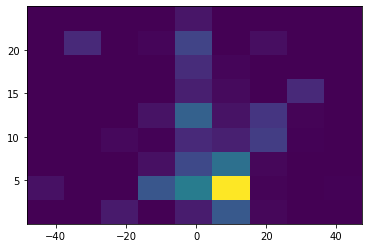

In [5]:
etrack_detA = data.loc[data['zpos']>0]

x = etrack_detA['xpos']/1e3
y = etrack_detA['zpos']/1e3
E = etrack_detA['E']

nbins=10
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show();
 



In [ ]:


xi = np.linspace(np.min(x),np.max(x),100)
yi = np.linspace(np.min(y),np.max(y),100)

points = [x,y]

# grid the data.
Ei = griddata((x,y),E,xi,yi,method='cubic')

#pcolormesh of interpolated uniform grid with log colormap
plt.pcolormesh(xi,yi,Ei,norm=matplotlib.colors.LogNorm())

plt.colormap()
plt.show()

In [ ]:
points

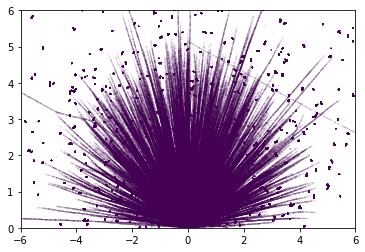

In [6]:
etrack_detA = data.loc[data['zpos']>0]


plt.scatter(etrack_detA['xpos']/1e3,etrack_detA['zpos']/1e3,s=.001,c=etrack_detA['E']/1e3);
plt.ylim([0,6]);
plt.xlim([-6,6]);



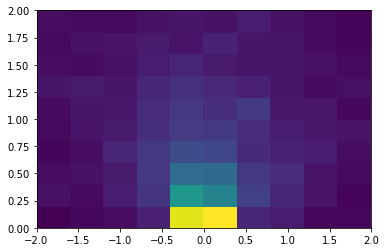

In [18]:
etrack_detA = data.loc[data['zpos']>0]

lim = 2; #mm


x = etrack_detA['xpos'].loc[(abs(etrack_detA['xpos'])<lim*1e3) & (abs(etrack_detA['zpos'])<lim*1e3)]/1e3
z = etrack_detA['zpos'].loc[(abs(etrack_detA['xpos'])<lim*1e3) & (abs(etrack_detA['zpos'])<lim*1e3)]/1e3


plt.hist2d(x,z, bins = 100);
plt.ylim([0,lim]);
plt.xlim([-lim,lim]);

In [ ]:
np.log(etrack['zpos']/1e3)

In [11]:
len(x)

1609790